In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

In [100]:
np.random.seed(0)
X = np.linspace(0, 10, 100) + np.random.randn(100) * 0.5  # Study hours
Y = np.linspace(0, 20, 100) + np.random.randn(100) * 0.9    # Study Score
Y = np.clip(Y, 0, 20)

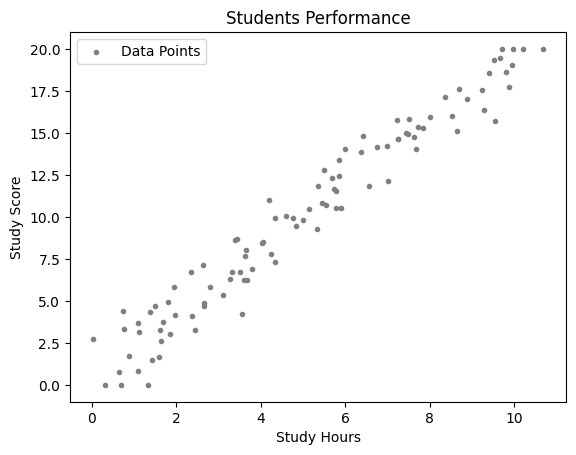

In [101]:
plt.scatter(X, Y, color = "gray", marker = ".", label="Data Points")
plt.title("Students Performance")
plt.xlabel("Study Hours")
plt.ylabel("Study Score")
plt.legend()
plt.show()

In [102]:
X = X.reshape(-1, 1)

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [104]:
class LinearLeastSquares:
    def __init__(self):
        self.slope = None
        self.intercept = None
    
    def fit(self, X, Y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_b.T, X_b)), X_b.T), Y)
        self.intercept = w[0]
        self.slope = w[1]
    
    def predict(self, X):
        return self.slope * X + self.intercept

In [105]:
lls = LinearLeastSquares()
lls.fit(X_train, Y_train)

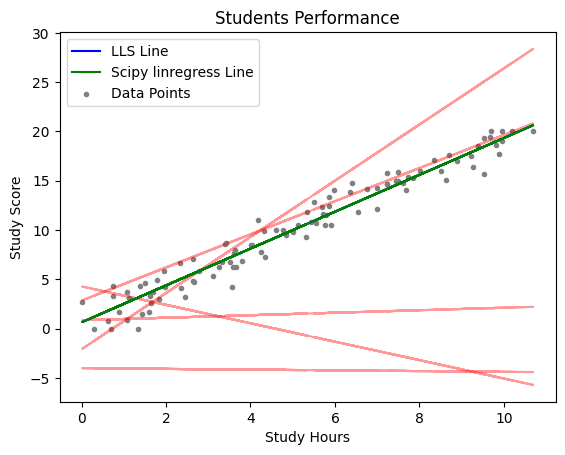

In [106]:
for _ in range(5):
    random_slope = np.random.uniform(-1, 3)
    random_intercept = np.random.uniform(-5, 5)
    plt.plot(X, random_slope * X + random_intercept, color = "red",alpha=0.4)
    
plt.plot(X, lls.predict(X), color='blue', label='LLS Line')

slope, intercept, _, _, _ = linregress(X_train.flatten(), Y_train)
plt.plot(X, slope * X + intercept, color='green', label='Scipy linregress Line')

plt.scatter(X, Y, color = "gray", marker = ".", label="Data Points")
plt.title("Students Performance")
plt.xlabel("Study Hours")
plt.ylabel("Study Score")
plt.legend()
plt.show()